<a href="https://colab.research.google.com/github/Aloxxa/r_public/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание

Есть две таблицы

•	таблица Clients содержит информацию о клиенте (ИНН, Название) и данные отчетности поквартально (номера статей Баланса и Отчета о финансовых результатах)

•	таблица Defaults содержит информацию о событиях дефолта по клиентам, с указанием типа события и даты события


# Заливка данных

In [ ]:
import sqlite3
import pandas as pd
import numpy as np

In [ ]:
Names = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG', 'HHH', 'III', 'JJJ', 'KKK', 'LLL']

In [ ]:
#ReportDate = pd.date_range(start='2020-12-31', end='2018-12-31', freq='Q')
ReportDate = ['2020-12-31', '2020-09-30', '2020-06-30', '2020-03-31', '2019-12-31', '2019-09-30', '2019-06-30', '2019-03-31', '2018-12-31']
repeated_rd = ReportDate * len(Names)
df_rd = pd.DataFrame({'ReportDate': repeated_rd})

In [ ]:
df_rd

,ReportDate
0,2020-12-31
1,2020-09-30
2,2020-06-30
3,2020-03-31
4,2019-12-31
...,...
103,2019-12-31
104,2019-09-30
105,2019-06-30
106,2019-03-31


In [ ]:
Names_repeat = [Name for Name in Names for i in range(len(ReportDate))]
df_users = pd.DataFrame({'Name': Names_repeat})

In [ ]:
df_users

,Name
0,AAA
1,AAA
2,AAA
3,AAA
4,AAA
...,...
103,LLL
104,LLL
105,LLL
106,LLL


In [ ]:
df_id = pd.DataFrame({'Id': range(len(df_users))})

In [ ]:
INN = [i + 1 for i in range(len(Names)) for j in range(len(ReportDate))]
df_INN = pd.DataFrame({'INN': INN})

In [ ]:
df_INN

,INN
0,1
1,1
2,1
3,1
4,1
...,...
103,12
104,12
105,12
106,12


In [ ]:
df_comb = pd.concat([df_id,df_INN, df_users, df_rd], axis=1)

In [ ]:
df_comb

,Id,INN,Name,ReportDate
0,0,1,AAA,2020-12-31
1,1,1,AAA,2020-09-30
2,2,1,AAA,2020-06-30
3,3,1,AAA,2020-03-31
4,4,1,AAA,2019-12-31
...,...,...,...,...
103,103,12,LLL,2019-12-31
104,104,12,LLL,2019-09-30
105,105,12,LLL,2019-06-30
106,106,12,LLL,2019-03-31


In [ ]:
df_clients = df_comb

In [ ]:
balance_accounts = ['1110', '1150', '2110', '1250', '1410', '1170', '1210']
df_clients = df_clients.reindex(columns=['Id', 'INN', 'Name', 'ReportDate'] + balance_accounts)

In [ ]:
np.random.seed(42)
def generate_poisson(min_val, max_val, size):
    return np.random.poisson(np.random.randint(min_val, max_val), size=size)

def poisson_distribution(df, mask, min_val, max_val):
    columns = ['1110', '1150', '2110', '1250', '1410', '1170', '1210']
    for column in balance_accounts:
        poisson = generate_poisson(min_val, max_val, size=len(df[mask]))
        df.loc[mask, column] = poisson

for name in df_clients['Name'].unique():
    mask = df_clients['Name'] == name
    if name in ['KKK', 'HHH', 'DDD', 'EEE', 'LLL']:
        poisson_distribution(df_clients, mask, 30, 200)
    elif name in ['BBB', 'CCC', 'GGG', 'III']:
        poisson_distribution(df_clients, mask, 300, 500)
    else:
        poisson_distribution(df_clients, mask, 600, 700)

In [ ]:
df_clients

,Id,INN,Name,ReportDate,1110,1150,2110,1250,1410,1170,1210
0,0,1,AAA,2020-12-31,709.0,620.0,661.0,625.0,632.0,649.0,620.0
1,1,1,AAA,2020-09-30,658.0,650.0,665.0,632.0,650.0,677.0,592.0
2,2,1,AAA,2020-06-30,621.0,672.0,683.0,656.0,638.0,626.0,678.0
3,3,1,AAA,2020-03-31,683.0,637.0,687.0,648.0,633.0,639.0,627.0
4,4,1,AAA,2019-12-31,667.0,693.0,637.0,651.0,629.0,636.0,616.0
...,...,...,...,...,...,...,...,...,...,...,...
103,103,12,LLL,2019-12-31,185.0,62.0,59.0,129.0,176.0,186.0,96.0
104,104,12,LLL,2019-09-30,181.0,44.0,54.0,127.0,157.0,184.0,124.0
105,105,12,LLL,2019-06-30,163.0,54.0,49.0,131.0,162.0,210.0,109.0
106,106,12,LLL,2019-03-31,194.0,41.0,48.0,128.0,188.0,190.0,125.0


In [ ]:
df_defaults = pd.DataFrame()

In [ ]:
INN_d = df_clients['INN'].unique()
df_defaults['INN'] = pd.Series(INN_d).sample(int(len(df_clients)*0.20), replace=True, random_state=42).values

In [ ]:
df_defaults['DefaultType'] = pd.Series(['Событие 1', 'Событие 2', 'Событие 3']).sample(len(df_defaults), replace=True, random_state=42).values

In [ ]:
df_defaults['DefaultDate'] = pd.Series(pd.date_range(start='2018-12-31', end='2020-12-31')).sample(len(df_defaults), replace=True, random_state=42).values

In [ ]:
df_defaults = df_defaults.sort_values(by=['INN', 'DefaultType', 'DefaultDate'])

In [ ]:
df_defaults

,INN,DefaultType,DefaultDate
19,2,Событие 2,2019-11-04
7,3,Событие 2,2020-09-05
16,3,Событие 2,2020-10-24
1,4,Событие 1,2020-03-10
13,4,Событие 3,2019-03-28
4,5,Событие 1,2019-03-12
12,5,Событие 1,2020-04-02
18,5,Событие 2,2020-10-22
17,6,Событие 2,2019-05-10
5,7,Событие 1,2020-11-30


# Анализ

Необходимо написать SQL запрос/запросы для сбора обучающей выборки с разметкой «хороших» (default_flag = 0) и «плохих» (default_flag=1) клиентов на каждую отчетную дату, т.е. сформировать таблицу (формат см. ниже), в которой будут указаны наблюдения по каждому клиенту на отчетную дату (если у клиента есть на эту дату отчетность) с разметкой «хороший» клиент или «плохой». «Плохим» считается клиент у которого между датой отчетности и датой дефолта не более 365 дней (т.е. дефолт случился в течение года после даты отчетности). Наблюдения, по которым однозначно нельзя сказать «хорошее» оно или «плохое» (т.е. год еще не прошел) исключаются из выборки. Также в выборку «плохое» наблюдение включается 1 раз, т.е. если по клиенту есть отчетность после даты отчетности, для которой проставлен default_flag=1, то такие наблюдения не включаются в выборку. Поле default_flag заполняется по самому раннему событию дефолта из таблицы Defaults.

Таблицу с выборкой необходимо сформировать по состоянию на 09.09.2021.


In [ ]:
con = sqlite3.connect('db')

In [ ]:
df_clients.to_sql('Clients', con, index=False, if_exists='replace')
df_defaults.to_sql('Defaults', con, index=False, if_exists='replace')

21

In [ ]:
def select(sql):
    return pd.read_sql(sql, con)

In [ ]:
sql = """
     with RankDef as (
         select
            INN,
            DefaultDate,
            ROW_NUMBER() over(PARTITION BY INN ORDER BY DefaultDate) as RankD
        from Defaults d
             where DefaultDate <= '2021-09-09'
    )
    select
        c.INN,
        c.ReportDate,
        case
            when julianday(r.DefaultDate) - julianday(c.ReportDate) <= 365 then 1
            else 0
        end as GB_flag,
        c.'1110',
        c.'1150',
        c.'2110',
        c.'1250',
        c.'1410',
        c.'1170',
        c.'1210'
    from Clients c
    left join RankDef r on r.INN = c.INN and r.RankD = 1
    where julianday('2021-09-09') - julianday(c.ReportDate) >= 365
    order by 1, 2
"""

In [ ]:
df = select(sql)

In [ ]:
df

,INN,ReportDate,GB_flag,1110,1150,2110,1250,1410,1170,1210
0,1,2018-12-31,0,635.0,669.0,663.0,647.0,615.0,627.0,634.0
1,1,2019-03-31,0,653.0,655.0,708.0,652.0,635.0,625.0,610.0
2,1,2019-06-30,0,625.0,620.0,672.0,600.0,644.0,631.0,626.0
3,1,2019-09-30,0,628.0,633.0,617.0,670.0,597.0,629.0,693.0
4,1,2019-12-31,0,667.0,693.0,637.0,651.0,629.0,636.0,616.0
...,...,...,...,...,...,...,...,...,...,...
79,12,2019-06-30,0,163.0,54.0,49.0,131.0,162.0,210.0,109.0
80,12,2019-09-30,0,181.0,44.0,54.0,127.0,157.0,184.0,124.0
81,12,2019-12-31,0,185.0,62.0,59.0,129.0,176.0,186.0,96.0
82,12,2020-03-31,0,176.0,50.0,63.0,140.0,159.0,209.0,98.0


In [ ]:
X = df.drop(['GB_flag', 'INN', 'ReportDate'] ,axis=1)
y = df['GB_flag']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
log_model = LogisticRegressionCV()

In [ ]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [ ]:
y_pred = log_model.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.86      0.93        22

    accuracy                           0.88        26
   macro avg       0.79      0.93      0.83        26
weighted avg       0.93      0.88      0.90        26



In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
y_pred_proba = log_model.predict_proba(scaled_X_test)[:, 1]

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt

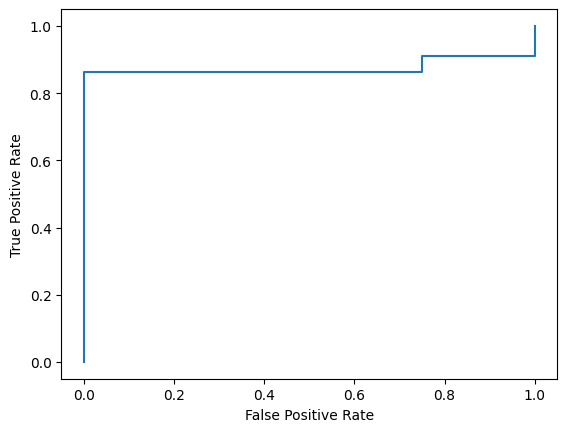

In [ ]:
plt.plot (fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
Gini  = 2 * roc_auc - 1
Gini

0.75

# Джини вручную




Сформировать выборку с потенциальными результатами работы модели (результатом модели может являться либо скоринг , либо PD) и оценить ее дискриминационную способность, т.е. рассчитать коэффициент Джини  (Gini = 2*AUCROC-1).
Построить по сформированной выборке ROC-кривую. В качестве инструментария использовать Python.


ПРОДОЛЖЕНИЕ ЛОГ РЕГРЕССИИ

In [ ]:
df_gini = pd.DataFrame()

In [ ]:
df_gini['y_score'] = y_pred_proba

In [ ]:
df_gini['y_true'] = df['GB_flag']

In [ ]:
df_gini

,y_score,y_true
0,0.791900,0
1,0.463117,0
2,0.441347,0
3,0.996872,0
4,0.937902,0
5,0.882993,0
6,0.978109,0
7,0.252278,1
8,0.258729,1
9,0.406354,1


In [ ]:
def Gini(df):
    sorted_df = df.sort_values(by='y_score', ascending=False)
    n = len(sorted_df)
    cumulative_sum = np.cumsum(sorted_df['y_true'])
    gini = ((1 - (2 * np.sum(cumulative_sum) - n * (n + 1))) / (n * np.mean(sorted_df['y_true']))/100)
    return gini

In [ ]:
Gini_coefficient = Gini(df_gini)
Gini_coefficient

0.179375

ВМЕСТО ЛОГ РЕГРЕССИИ БУДЕТ PD

In [ ]:
df_gini_2 = pd.DataFrame()

In [ ]:
df_gini_2['GB_flag'] = df['GB_flag']

In [ ]:
np.random.seed(42)
df_gini_2['PredictPD'] = np.random.rand(len(df_gini_2))

In [ ]:
df_gini_2

,GB_flag,PredictPD
0,0,0.374540
1,0,0.950714
2,0,0.731994
3,0,0.598658
4,0,0.156019
...,...,...
79,0,0.115869
80,0,0.863103
81,0,0.623298
82,0,0.330898


In [ ]:
df_gini_2.columns = ['y_true', 'y_score']

In [ ]:
df_gini_2['y_score'] = df_gini_2['y_score'].astype(int)
#опционально

In [ ]:
Gini_coefficient = Gini(df_gini_2)
Gini_coefficient
#без astype(int) Gini_coefficient = 0.2655

0.42583333333333334